<a href="https://colab.research.google.com/github/atlas-github/fi_analytics/blob/master/Chapter_3_Visualize_data_using_Matplotlib%2C_Seaborn_and_Plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Start by importing the dataset.

In [1]:
import pandas as pd
df = pd.read_csv("sample-users.csv")
df

,user_id,birth_year,country,user_settings,plan
0,user_0,1989,Poland,1,Regular
1,user_1,1975,United Kingdom,0,Regular
2,user_2,1987,Poland,0,Regular
3,user_3,1994,France,0,Regular
4,user_4,1985,United Kingdom,0,Regular
...,...,...,...,...,...
16271,user_19425,1994,Ireland,0,Regular
16272,user_19426,1977,Estonia,0,Regular
16273,user_19427,1991,Poland,0,Regular
16274,user_19428,1984,United Kingdom,0,Regular


I would also recommend building a pivot table like in Excel, just to quickly get a sense of the user distribution I should have. 

In [3]:
group = df.groupby(['country', 'plan'])['plan'].aggregate('count').unstack().reset_index()
group

plan,country,Premium,Regular,Special
0,Denmark,22,409,15
1,Estonia,31,939,21
2,France,101,1925,84
3,Ireland,41,1137,36
4,Lithuania,10,630,6
5,Malta,17,510,21
6,Poland,41,2231,34
7,Portugal,16,577,11
8,Romania,78,966,52
9,United Kingdom,357,5809,149


The pivot table shows most of the users are on the Regular plan, and the bulk of the users stay in the United Kingdom. Therefore, any resulting clustered bar chart should show the highest bar belonging to the United Kingdom, and it’s likely the bars for users on the Special plan will be difficult to see. 

#Matplotlib

Start by importing the matplotlib package. 

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

To plot a clustered bar chart on matplotlib, I use the following code. 

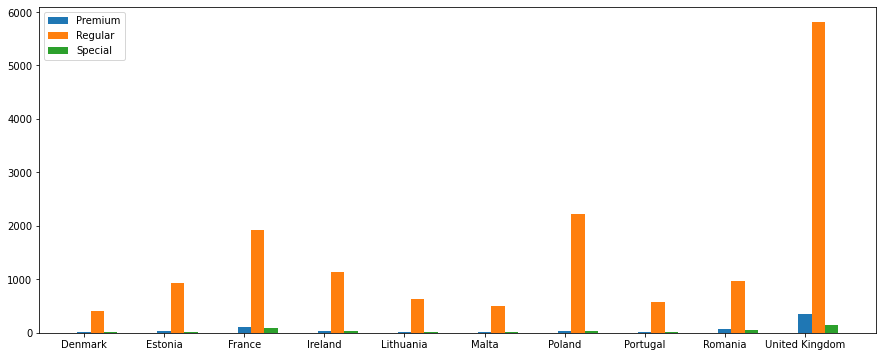

In [5]:
#Set bar width
barWidth = 0.5

#Set position of the bars
r1 = [1, 4, 7, 10, 13, 16, 19, 22, 25, 28]
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

#Set plot size
fig, ax = plt.subplots(figsize=(15, 6))

#Plot the bars and legend
plt.bar(r1, group.iloc[:, 1], label="Premium", width = barWidth)
plt.bar(r2, group.iloc[:, 2], label="Regular", width = barWidth)
plt.bar(r3, group.iloc[:, 3], label="Special", width = barWidth)
plt.legend()

#Set the x-axis labels
plt.xticks(r1, ['Denmark', 'Estonia', 'France', 'Ireland', 'Lithuania', 'Malta', 'Poland', 'Portugal', 'Romania', 'United Kingdom'])

plt.show()


Notice that users need to set various parameters like the width of the  bar, the position of the bars, which data to take from the pivot table group, and the x-axis labels. Matplotlib is useful if you would like to highly customize your chart to fit your organisation’s purposes like obtaining business insights for strategies. 

#Seaborn

Seaborn is another data visualization library based on matplotlib. The graphs produced by this library tend to be more attractive compared to matplotlib, and the code is significantly easier to write. An example is as follows. 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


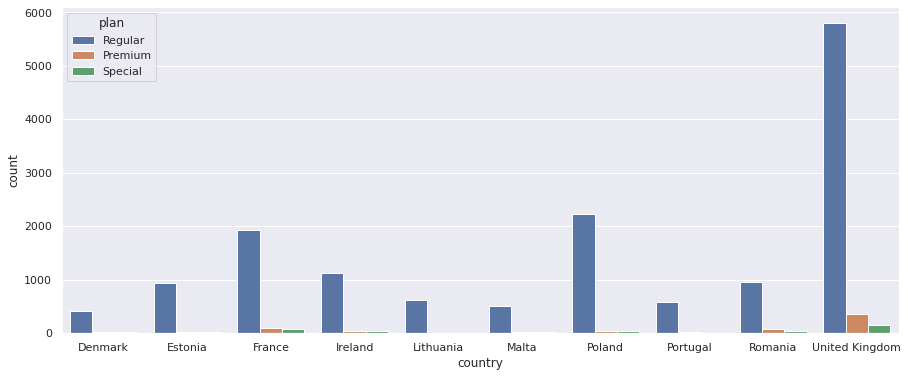

In [6]:
#Set plot size
plt.figure(figsize = (15, 6))

import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="country", hue="plan", data=df, order = group.iloc[:, 0])

#Plotly


Plotly is useful if you would like to interact with your chart, like showing the data label when hovering over the bar, or zooming in for more complex charts. There is another library called Bokeh which has similar capabilities like Plotly, which is not covered in this book. 

The code to create the clustered bar chart in Plotly is as follows.


In [7]:
import plotly.graph_objects as go

order=group.iloc[:, 0]

fig = go.Figure(data=[
    go.Bar(name='Regular', x=order, y=group.iloc[:, 2]),
    go.Bar(name='Premium', x=order, y=group.iloc[:, 1]),
    go.Bar(name='Special', x=order, y=group.iloc[:, 3])
])

#Change the bar mode
fig.update_layout(barmode='group')
fig.show()


The chart design looks similar to the one generated by Seaborn. There is one large difference here: look at the top right of the image, and notice there are a few options available to users. The functions allow users to zoom into a chart, or show data labels. 